In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter

# Experiment 1

### Data Collection

1.1: Real Image acting as an Object for a Converging Lens

In [2]:
# #Mesuring the focal lengths of lens A, B, C
# #all measurements made on optical bench, uncertainty of +/- 0.05 cm
# fObj = 20 #location of the F object 
# lensMount = 50 #location of the lens mount
# focA = np.array([92.0, 91.4, 91.2]) #location of screen where image was focused
# focB = np.array([81.6, 81.3, 81.4])
# focC = np.array([56.3, 56.2, 56.3])

#Remeasuring 
fObj = np.array([22.6, 22.6, 50.0]) #location of the F object, [A,B,C]
lensMount = np.array([53.4, 45.7, 60.0]) #location of the lens mount [A,B,C]
focA = np.array([93.8, 94.1, 93.9]) #location of screen where image was focused
focB = np.array([91.9, 92.1, 93.1])
focC = np.array([70.3, 70.2, 70.1])

In [3]:
def focLength(o,i):
    return 1/(1/o + 1/i)

In [4]:
#calculating focal lengths
focusA = focLength(lensMount[0] - fObj[0], np.mean(focA) - np.mean(lensMount))
focusB = focLength(lensMount[1] - fObj[1], np.mean(focB) - np.mean(lensMount))
focusC = focLength(lensMount[2] - fObj[2], np.mean(focC) - np.mean(lensMount))

print('Focal Length of Lens A: {:.2f} cm'.format(round(focusA,2)))
print('Focal Length of Lens B: {:.2f} cm'.format(round(focusB,2)))
print('Focal Length of Lens C: {:.2f} cm'.format(round(focusC,2)))

Focal Length of Lens A: 17.57 cm
Focal Length of Lens B: 14.55 cm
Focal Length of Lens C: 6.32 cm


In [5]:
fObj = 22.6
lens = 32.5 
img = 42.9

#Measuring physical dimensions of the F-Object
oLen = np.array([1.57, 1.55, 1.56]) #cm +/- 0.005

#image dimensions with C-lens
iLen = np.array([1.56, 1.53, 1.48])

In [6]:
fObj = 4.9
cLens = 14.9
bLens = 53.6
screen = np.array([87.0, 86.8, 86.2])

1.2: A Virtual Object

In [7]:
#calculating offset
standW = 5.03
right = 0.94
neck = 1.43
offset = right + neck

#mesuring things
fObj = 4.9
cLens = 14.8
rObject = np.array([25.0, 25.1, 25.0])
bLens = 19.8
img = np.array([23.0, 23.3, 23.4, 21.2, 22.9, 21.4, 21.5])+offset - bLens

In [8]:
dObject = bLens - 25#(cLens + 10.4)
dImg = np.mean(img)
print('Magnification: {:.4f}'.format(dImg/dObject))

Magnification: -0.9530


1.3: Virtual Image acting as a Real Object 

In [9]:
#Measure
bObj = 25.0 - 4.9
aImg = 52.0 - 38.9

objA = 1/(1/focusA - 1/aImg)
bImg = 38.9 - objA - 25.0
print(bImg)

65.39736932438764


In [10]:
fObj = 4.9
bLoc = np.array([18.4, 23.0, 25.8, 22.8])
aLoc = np.array([31.9, 36.4, 43.6, 41.0 ])
aImg = np.array([[51.2, 51.3, 51.2], [50.5, 50.5, 50.6], [55.4, 55.5, 55.4], [55.1, 55.1, 55.1]])

### Data Analysis

In [11]:
nBFoc = focLength(bImg,bObj)
print('New Calculated Focal Length of Lens B: {:.4f} cm '.format(focusB))
print('New Calculated Focal Length of Lens B: {:.4f} cm '.format(nBFoc))

New Calculated Focal Length of Lens B: 14.5531 cm 
New Calculated Focal Length of Lens B: 15.3746 cm 


Performing Agreement test

In [12]:
def f1(a0,a1):
    return(1/a0 + 1/a1)**(-2) * (1/a0**2)

def focErr(o, eO, i, eI):#calculates error for focus length
    t1 = (f1(o,i)*eO)**2
    t2 = (f1(i,o)*eI)**2
    return np.sqrt(t1+t2)

In [14]:
#finding old error
fObj = np.array([22.6, 22.6, 50.0]) #location of the F object, [A,B,C]
lensMount = np.array([53.4, 45.7, 60.0]) #location of the lens mount [A,B,C]
focB = np.array([91.9, 92.1, 93.1])
obj = lensMount[1] - fObj[1]
img =np.mean(focB) - np.mean(lensMount)
err = np.sqrt(2*0.05**2)
oErr = focErr(obj, err, img, err)

#finding new error
nErr = focErr(bObj,err,bImg,err)

In [15]:
test = np.abs(focusB-nBFoc) < 2*np.sqrt(oErr**2 + nErr**2)
print('The results agree with each other: {}'.format(test))

The results agree with each other: False


# Experiment 2

### Data Collection

In [16]:
npMC = np.array([9, 9.5, 10.5])#left eye
npMK = np.array([12.0, 11.0, 11.0])#left eye
err = 0.5
print("Coy's nearpoint: {:.2f}".format(np.mean(npMC)))
print("King's nearpointL {:.2f}".format(np.mean(npMK)))

Coy's nearpoint: 9.67
King's nearpointL 11.33


In [17]:
cLoc = 31.9
arrLoc = 39.0
hLens = [3.0, 3.5, 3.0]

In [18]:
offset = 0.97
stop = 24.0
cameraLoc = stop-5+offset

Attaching camera images

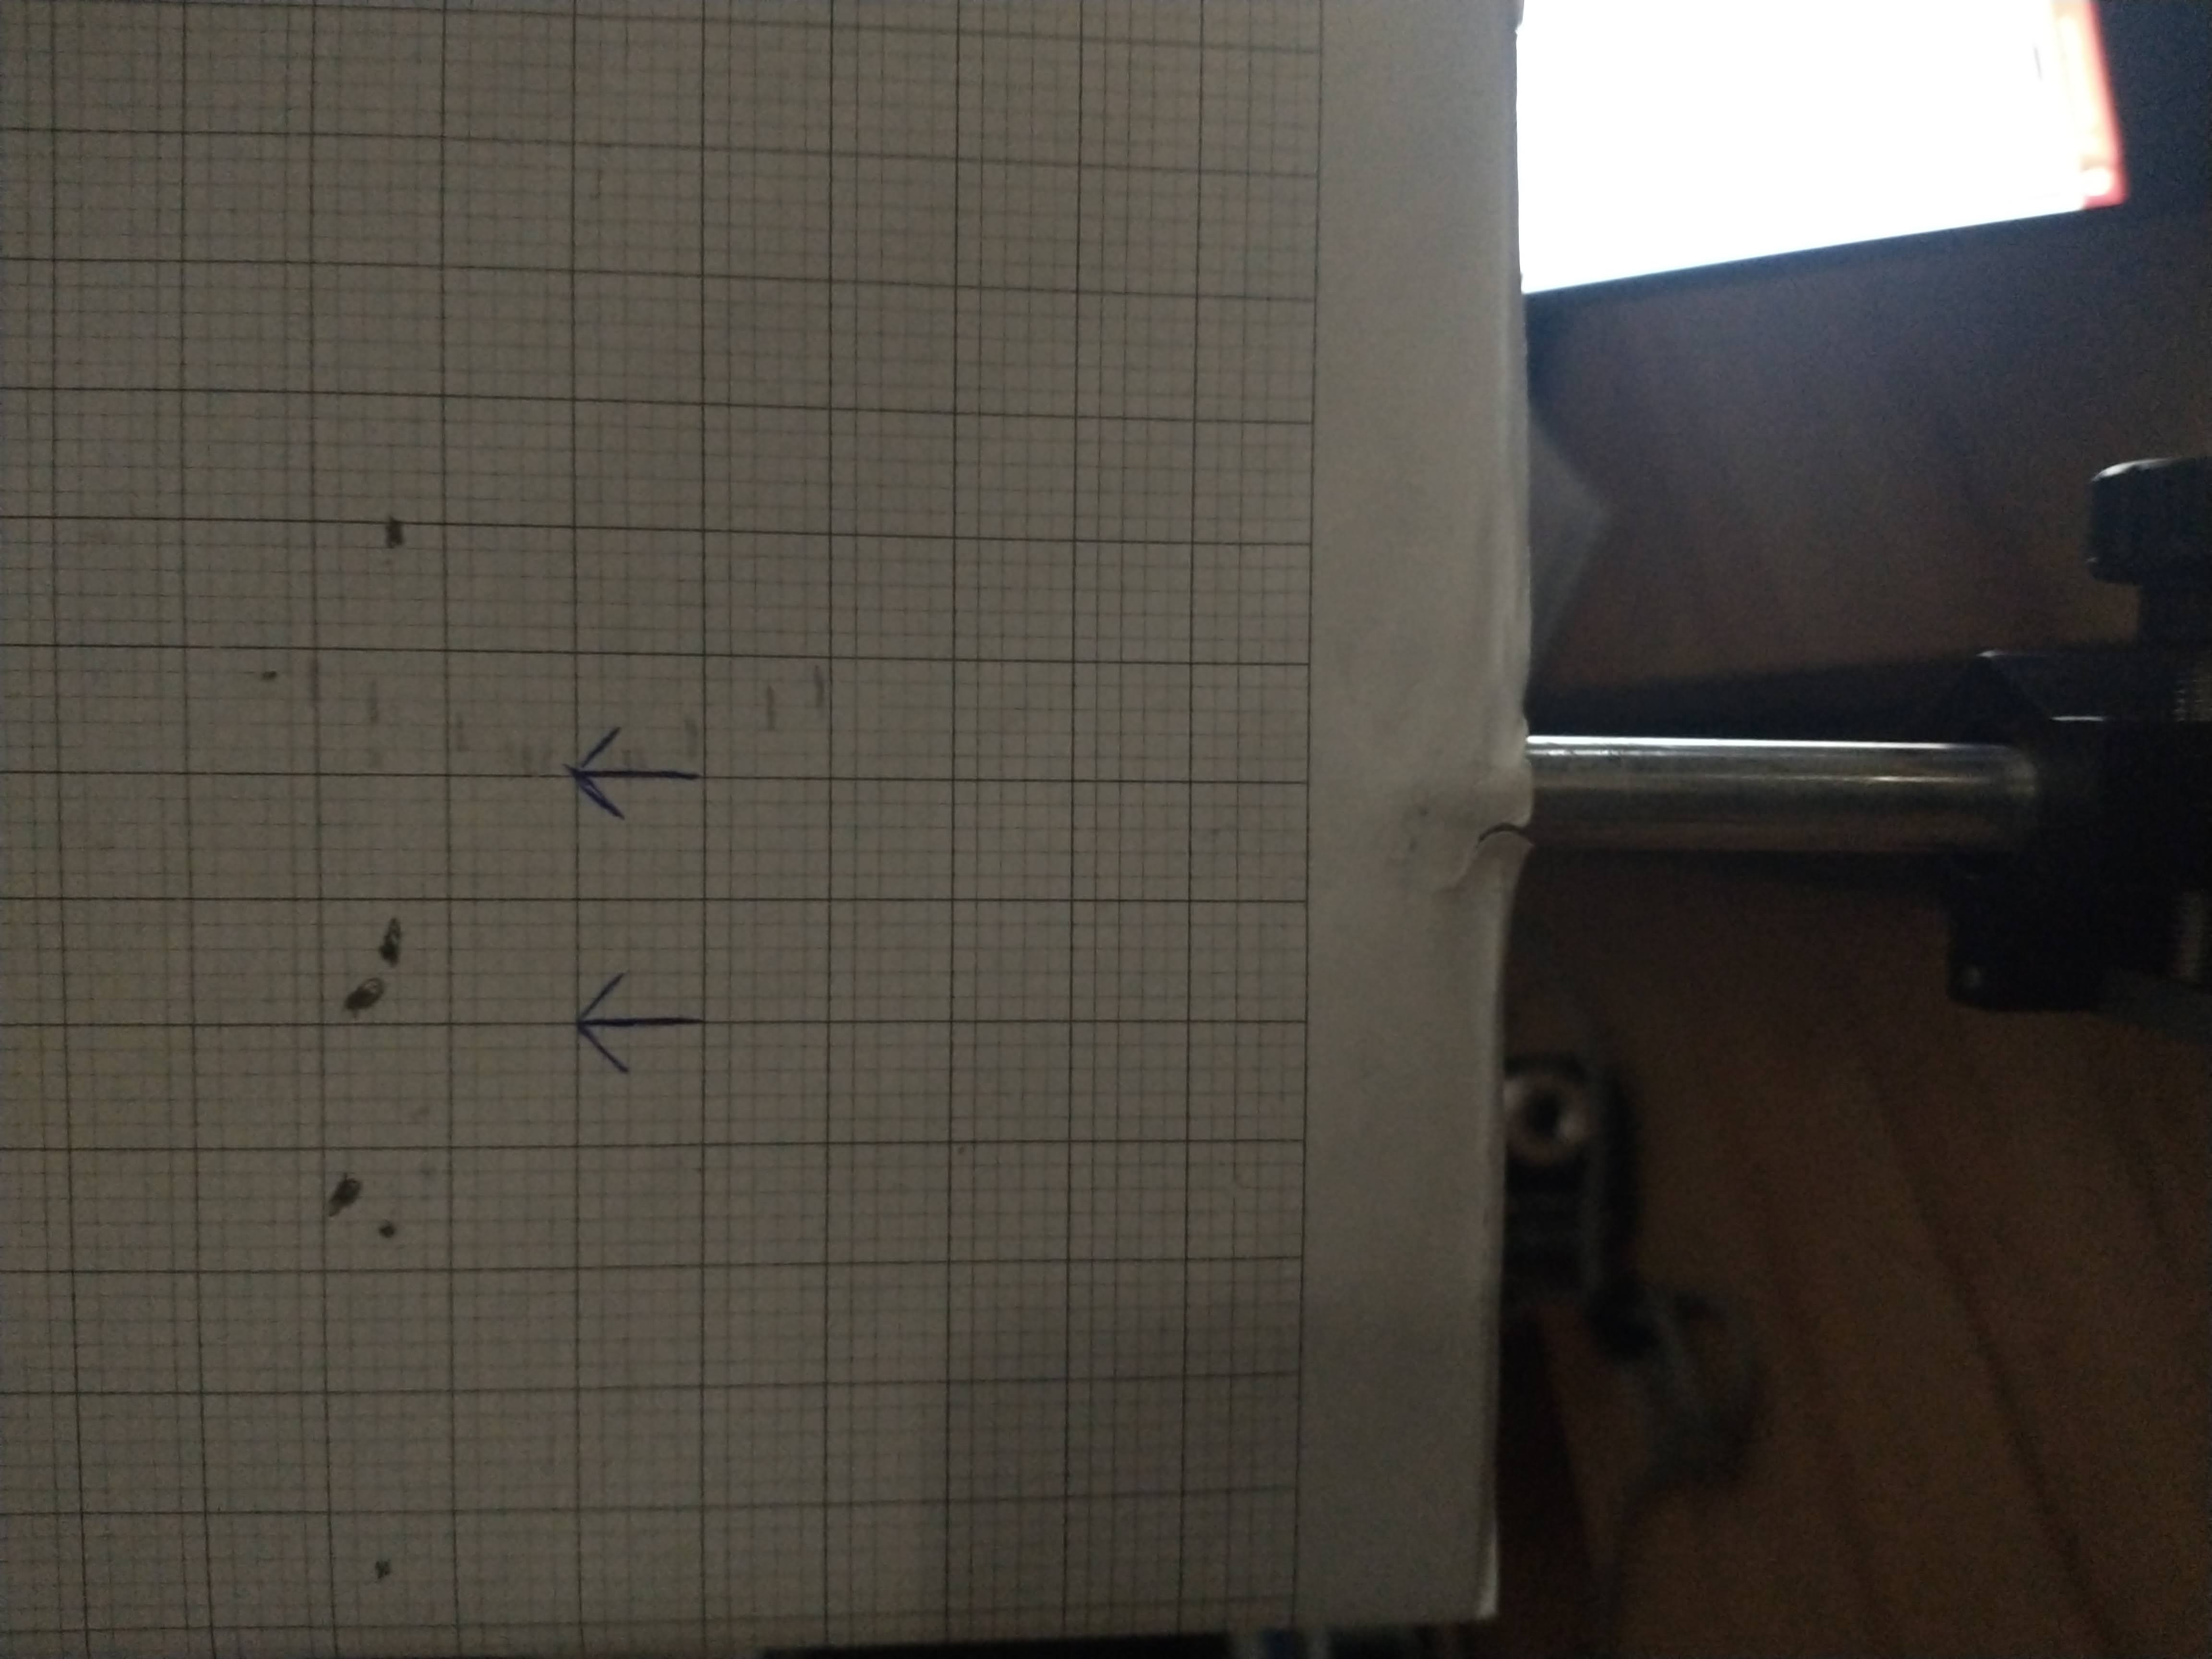

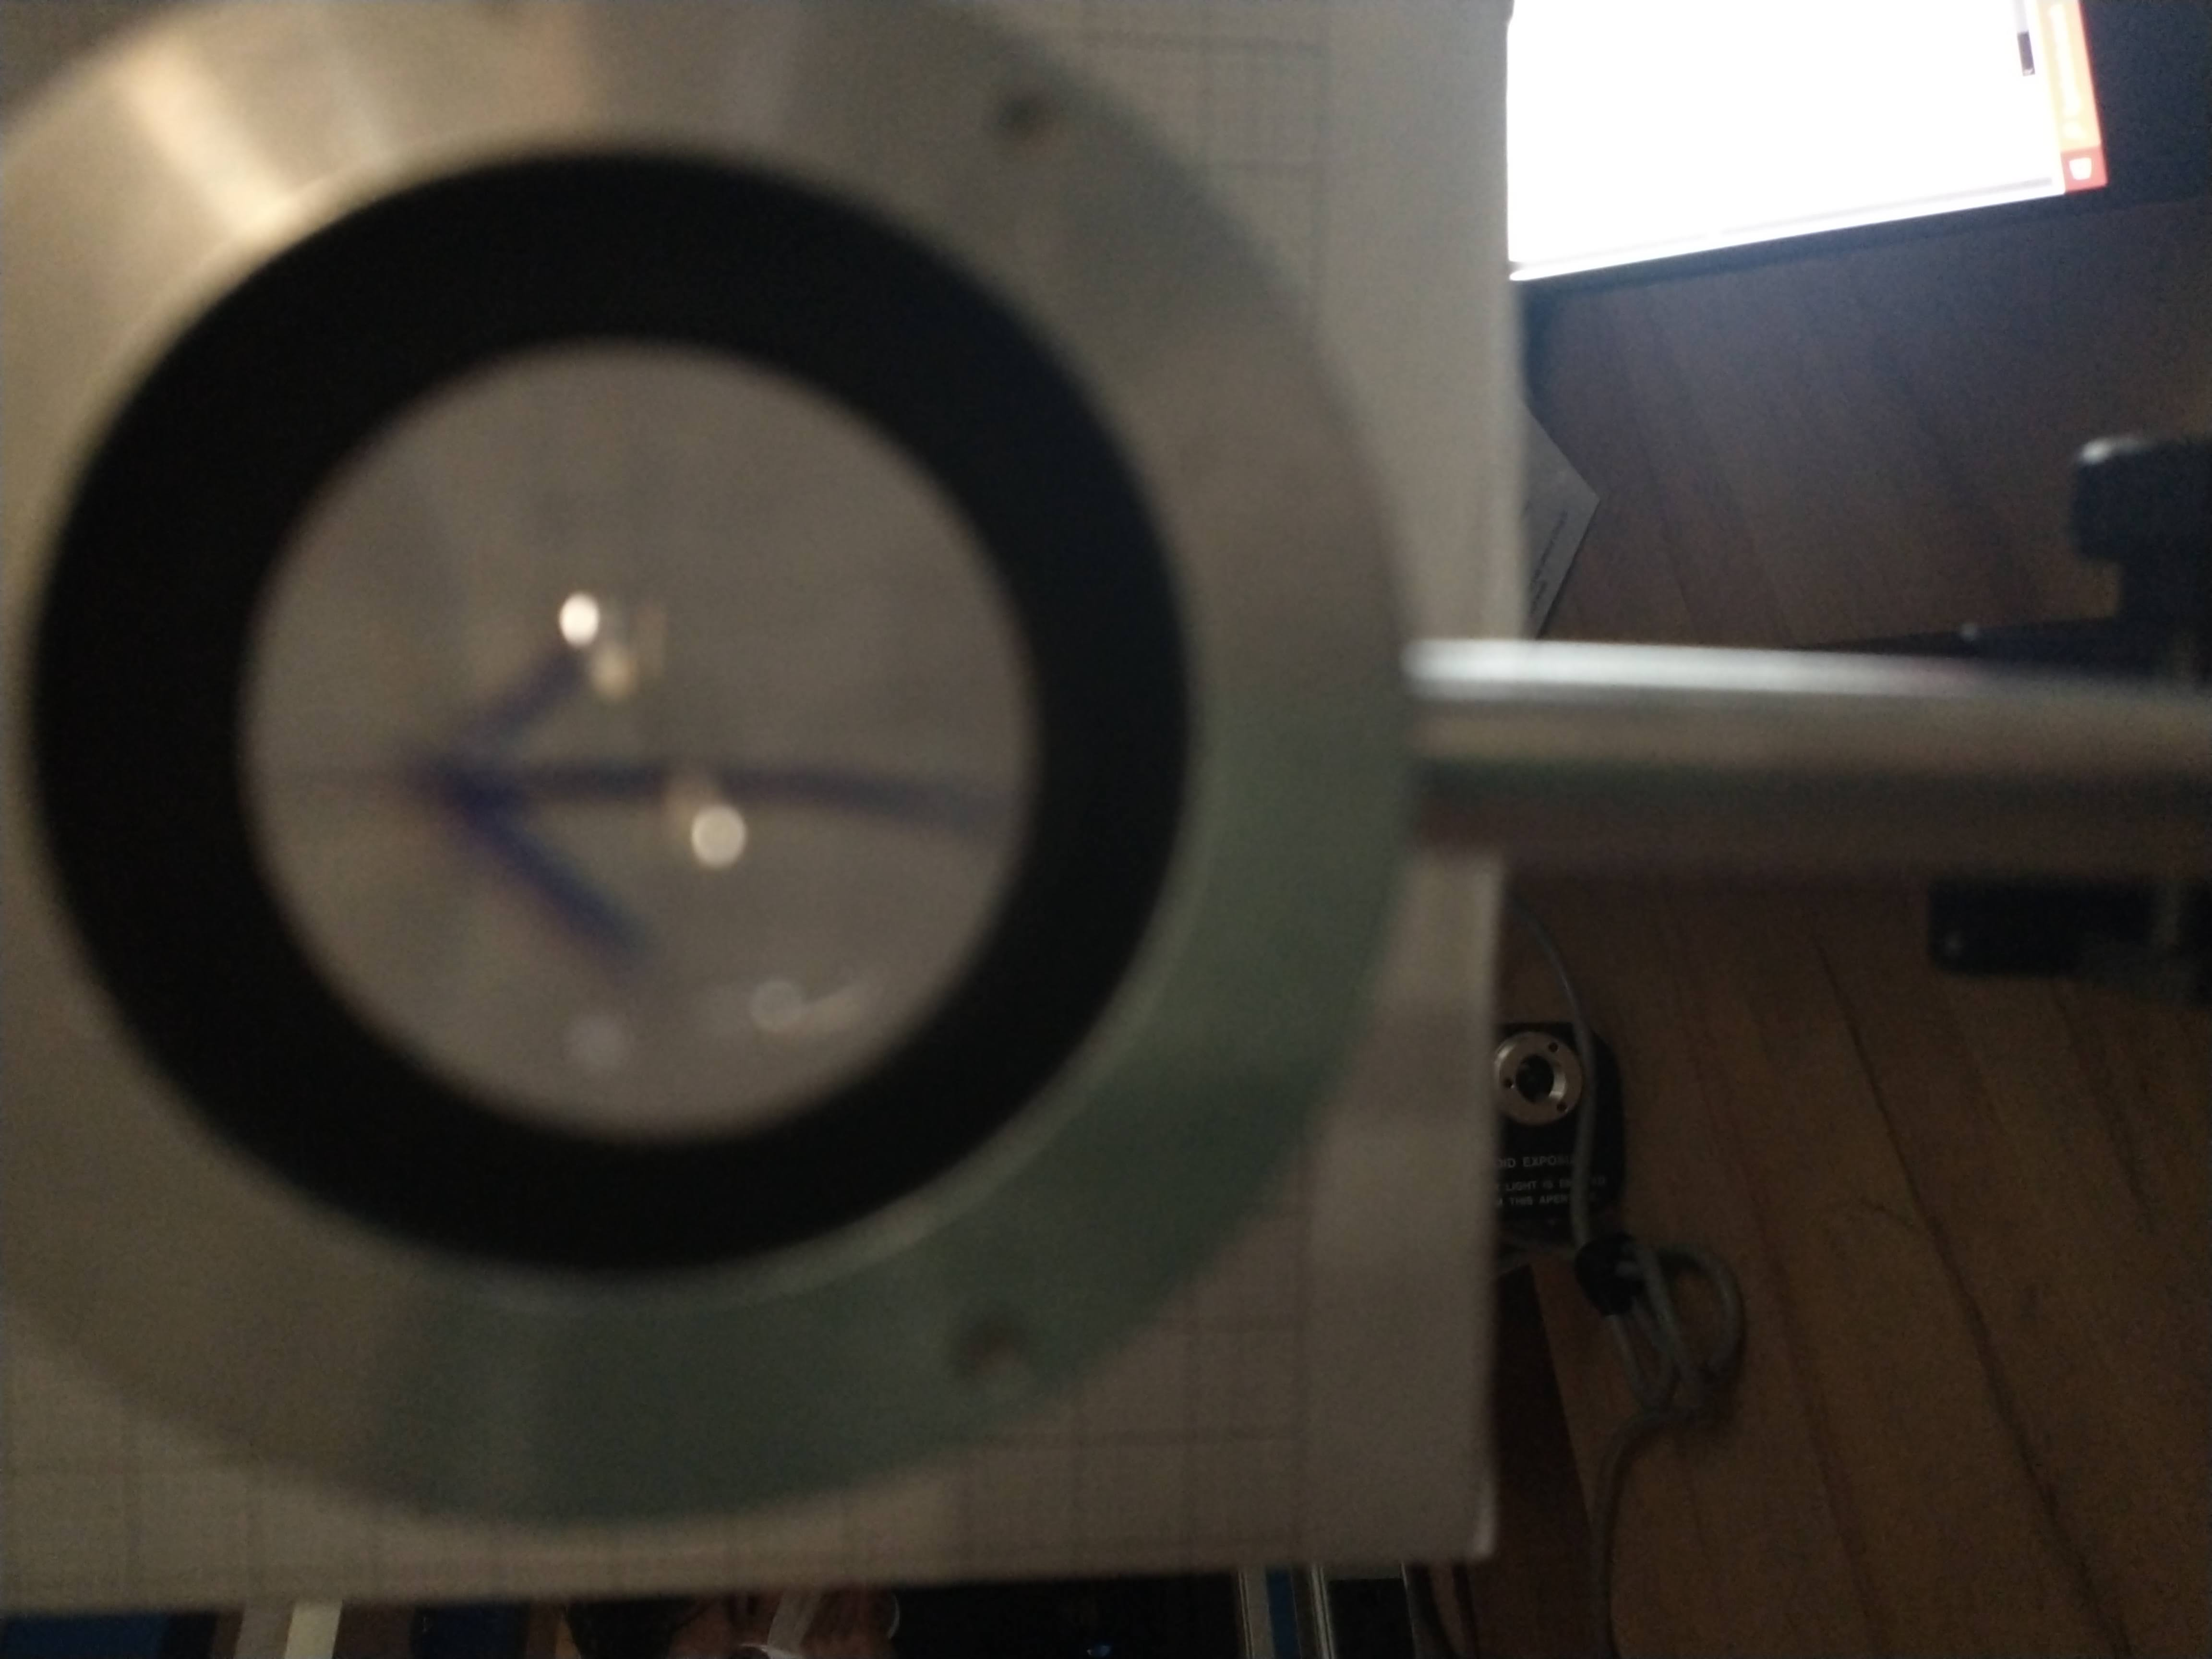

In [19]:
magnified = np.array([278, 279, 272]) #pixels on my monitor
original = np.array([60, 59, 61])
mag = magnified.mean() / original.mean() #relative magnification
print('Relative Magnification factor: {:.4f}'.format(mag))

Relative Magnification factor: 4.6056


# Experiment 3

### Data Collection

In [39]:
#Finding Focal Length
fObj = 5
dLens = np.array([20.3, 26.4, 22.9, 28.6])
bLens = np.array([41.5, 49.4, 40.0, 54.6])
bImg = np.array([[75.6, 75.4, 75.7], [79.8, 80.2, 80.1], [80.5, 80.6, 80.7], [82.8, 82.6, 82.7]])

#Finding Curvature
curve = np.array([-3.25, -3.25, -3.25]) #percision error of 0.125 #n = 1.53
# outGap = np.array([1.66, 1.66, 1.68]) #percision error of 0.005
# inGap = np.array([1.33, 1.35, 1.37]) #Don't actually need these lmao

In [25]:
#returns the object position given the focal length and image position
def objPos(f,i): 
    return 1/(1/f - 1/i)

In [36]:
rBI = np.mean(bImg, axis=1) - bLens #relative location of the B lens Image
rBO = objPos(np.ones(len(rBI))*focusB,rBI) #relative object location
aDI = np.mean(bImg, axis=1) - rBO #absolute location of D image
rDI = aDI - dLens #relative image location
rDO = dLens - fObj#relative object location
focusD = focLength(rDO,rDI)
print('Mean Measurement of Lens D focal Length: {:.4f}'.format(focusD.mean()))
print('Standard Deviation of Measurement: {:.4f}'.format(focusD.std()))

Mean Measurement of Lens D focal Length: 11.3897
Standard Deviation of Measurement: 0.7375


In [40]:
R = (1.55 - 1) / np.mean(curve) #radius of curvature
print('Calculated Radius of Curvature: {:.2f} m'.format(R))

Calculated Radius of Curvature: -0.17 m


# Experiemnt 4

### Data Collection

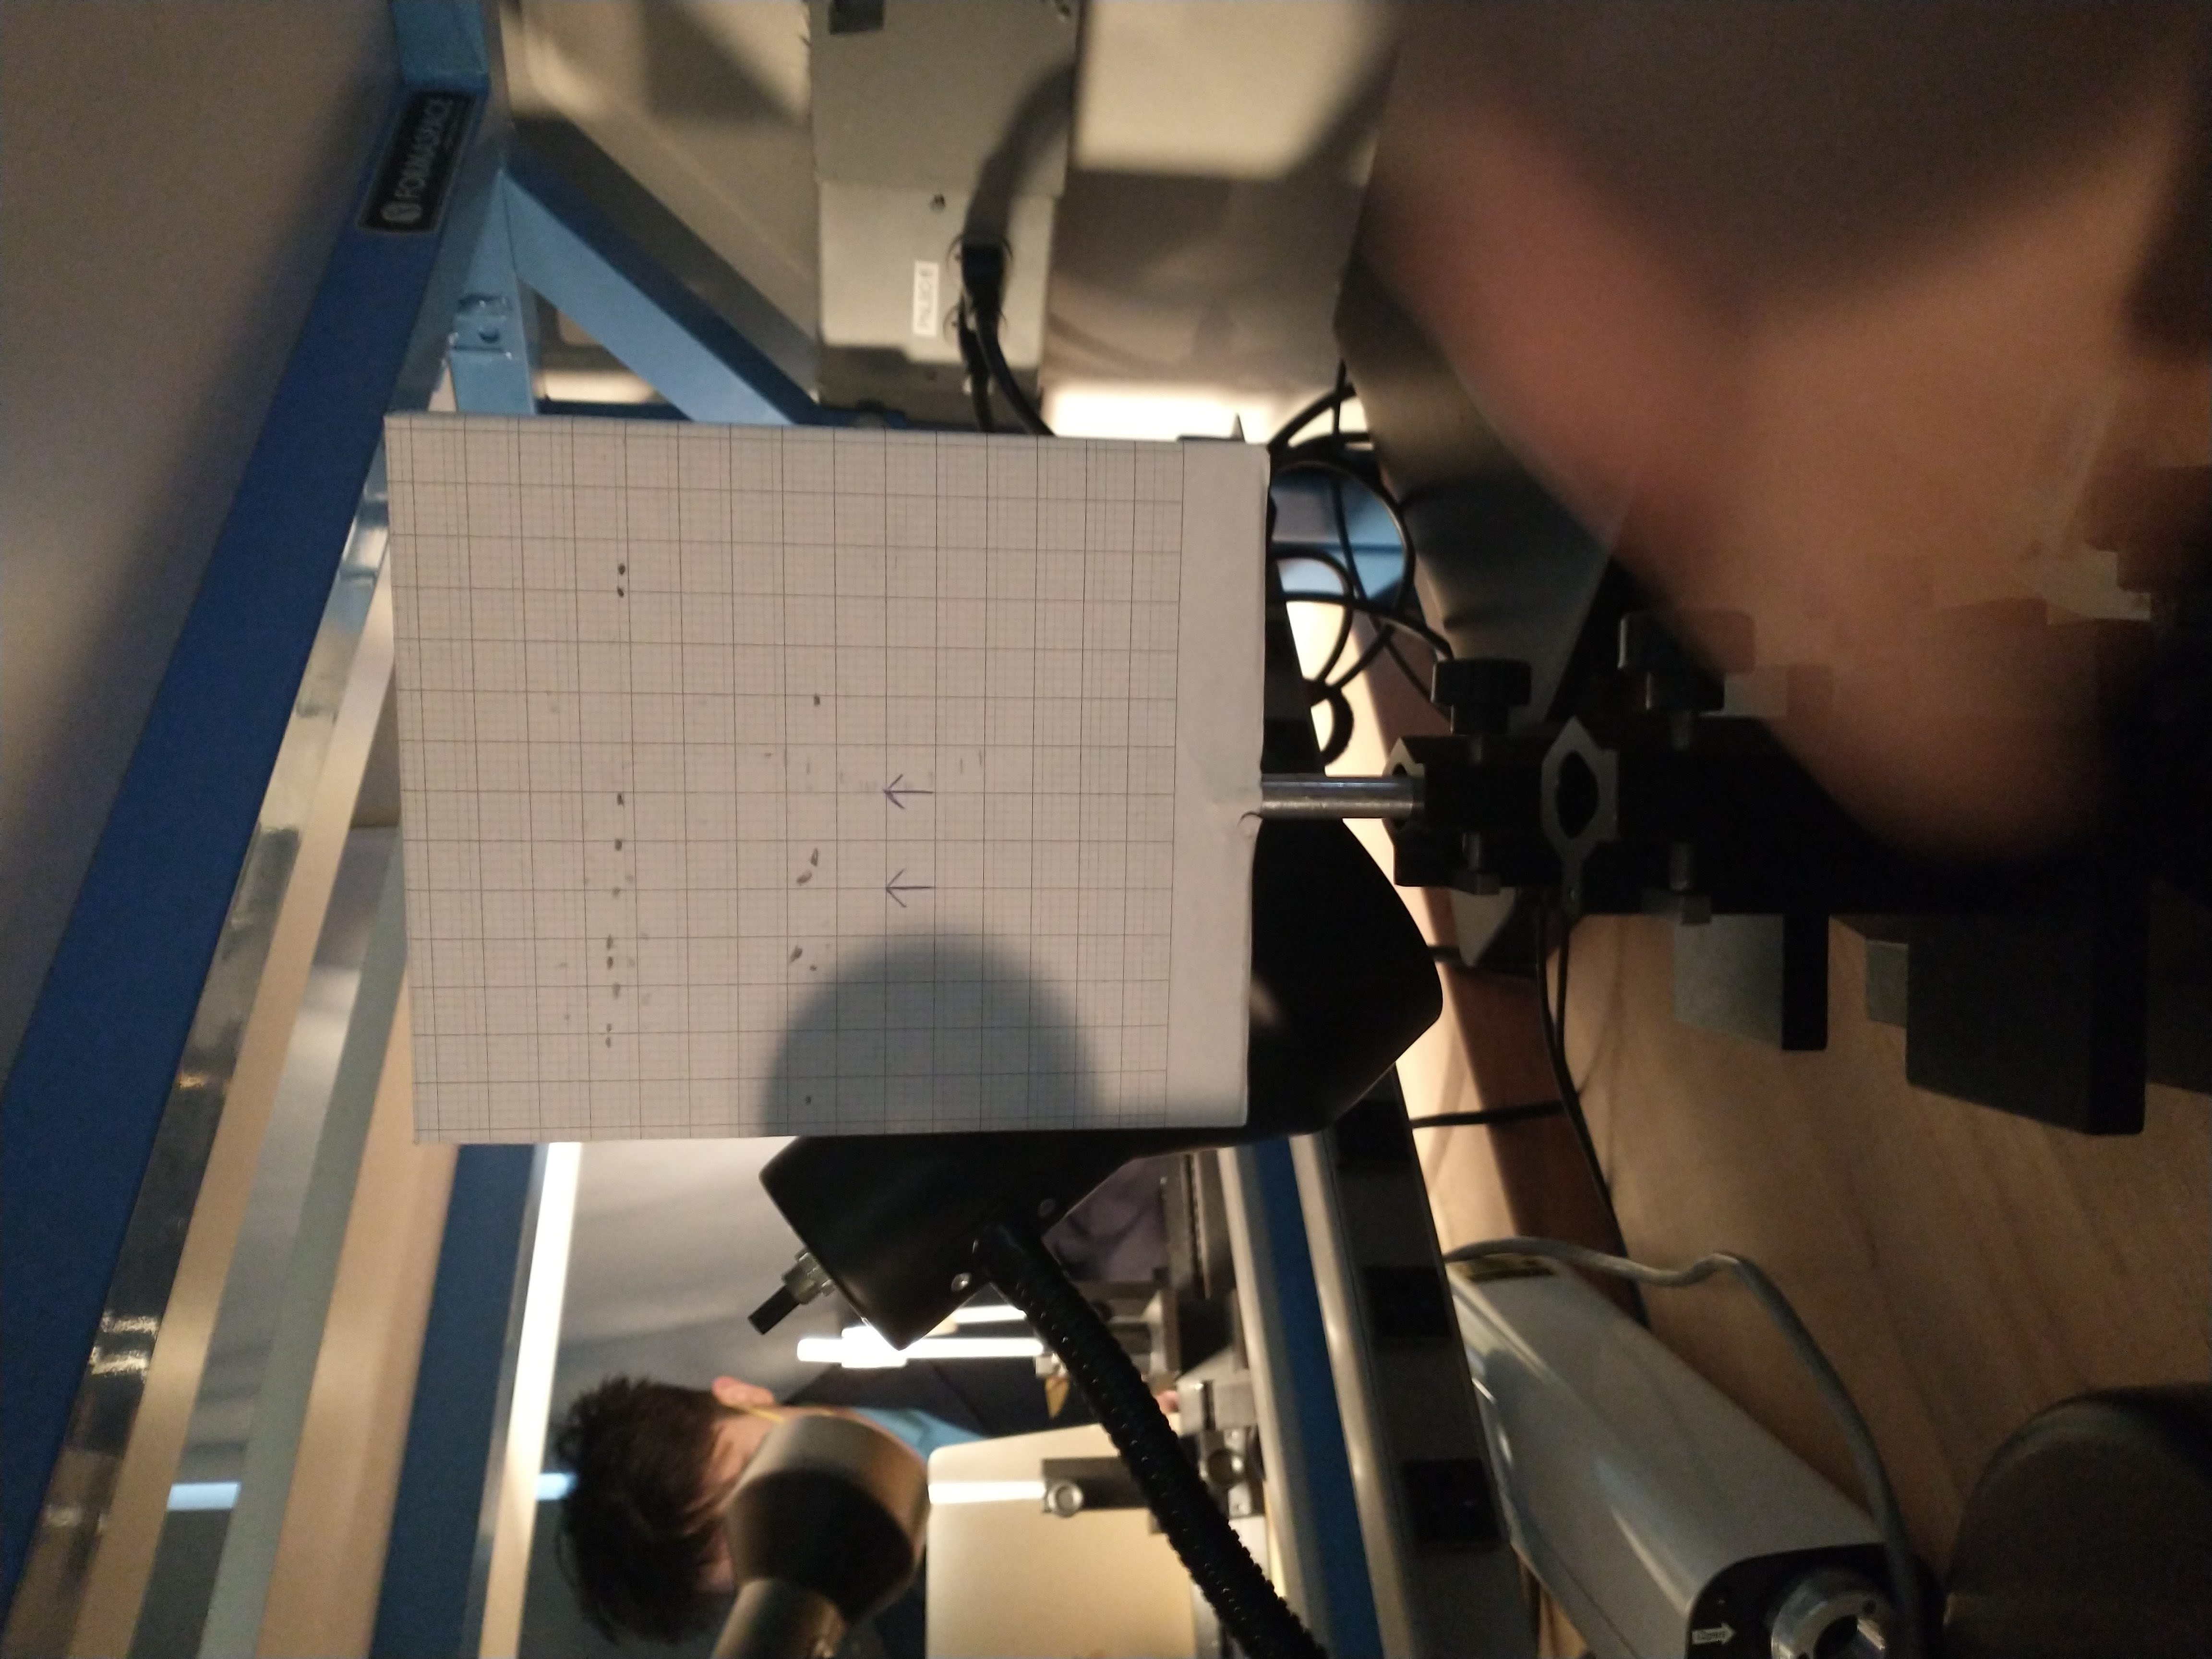

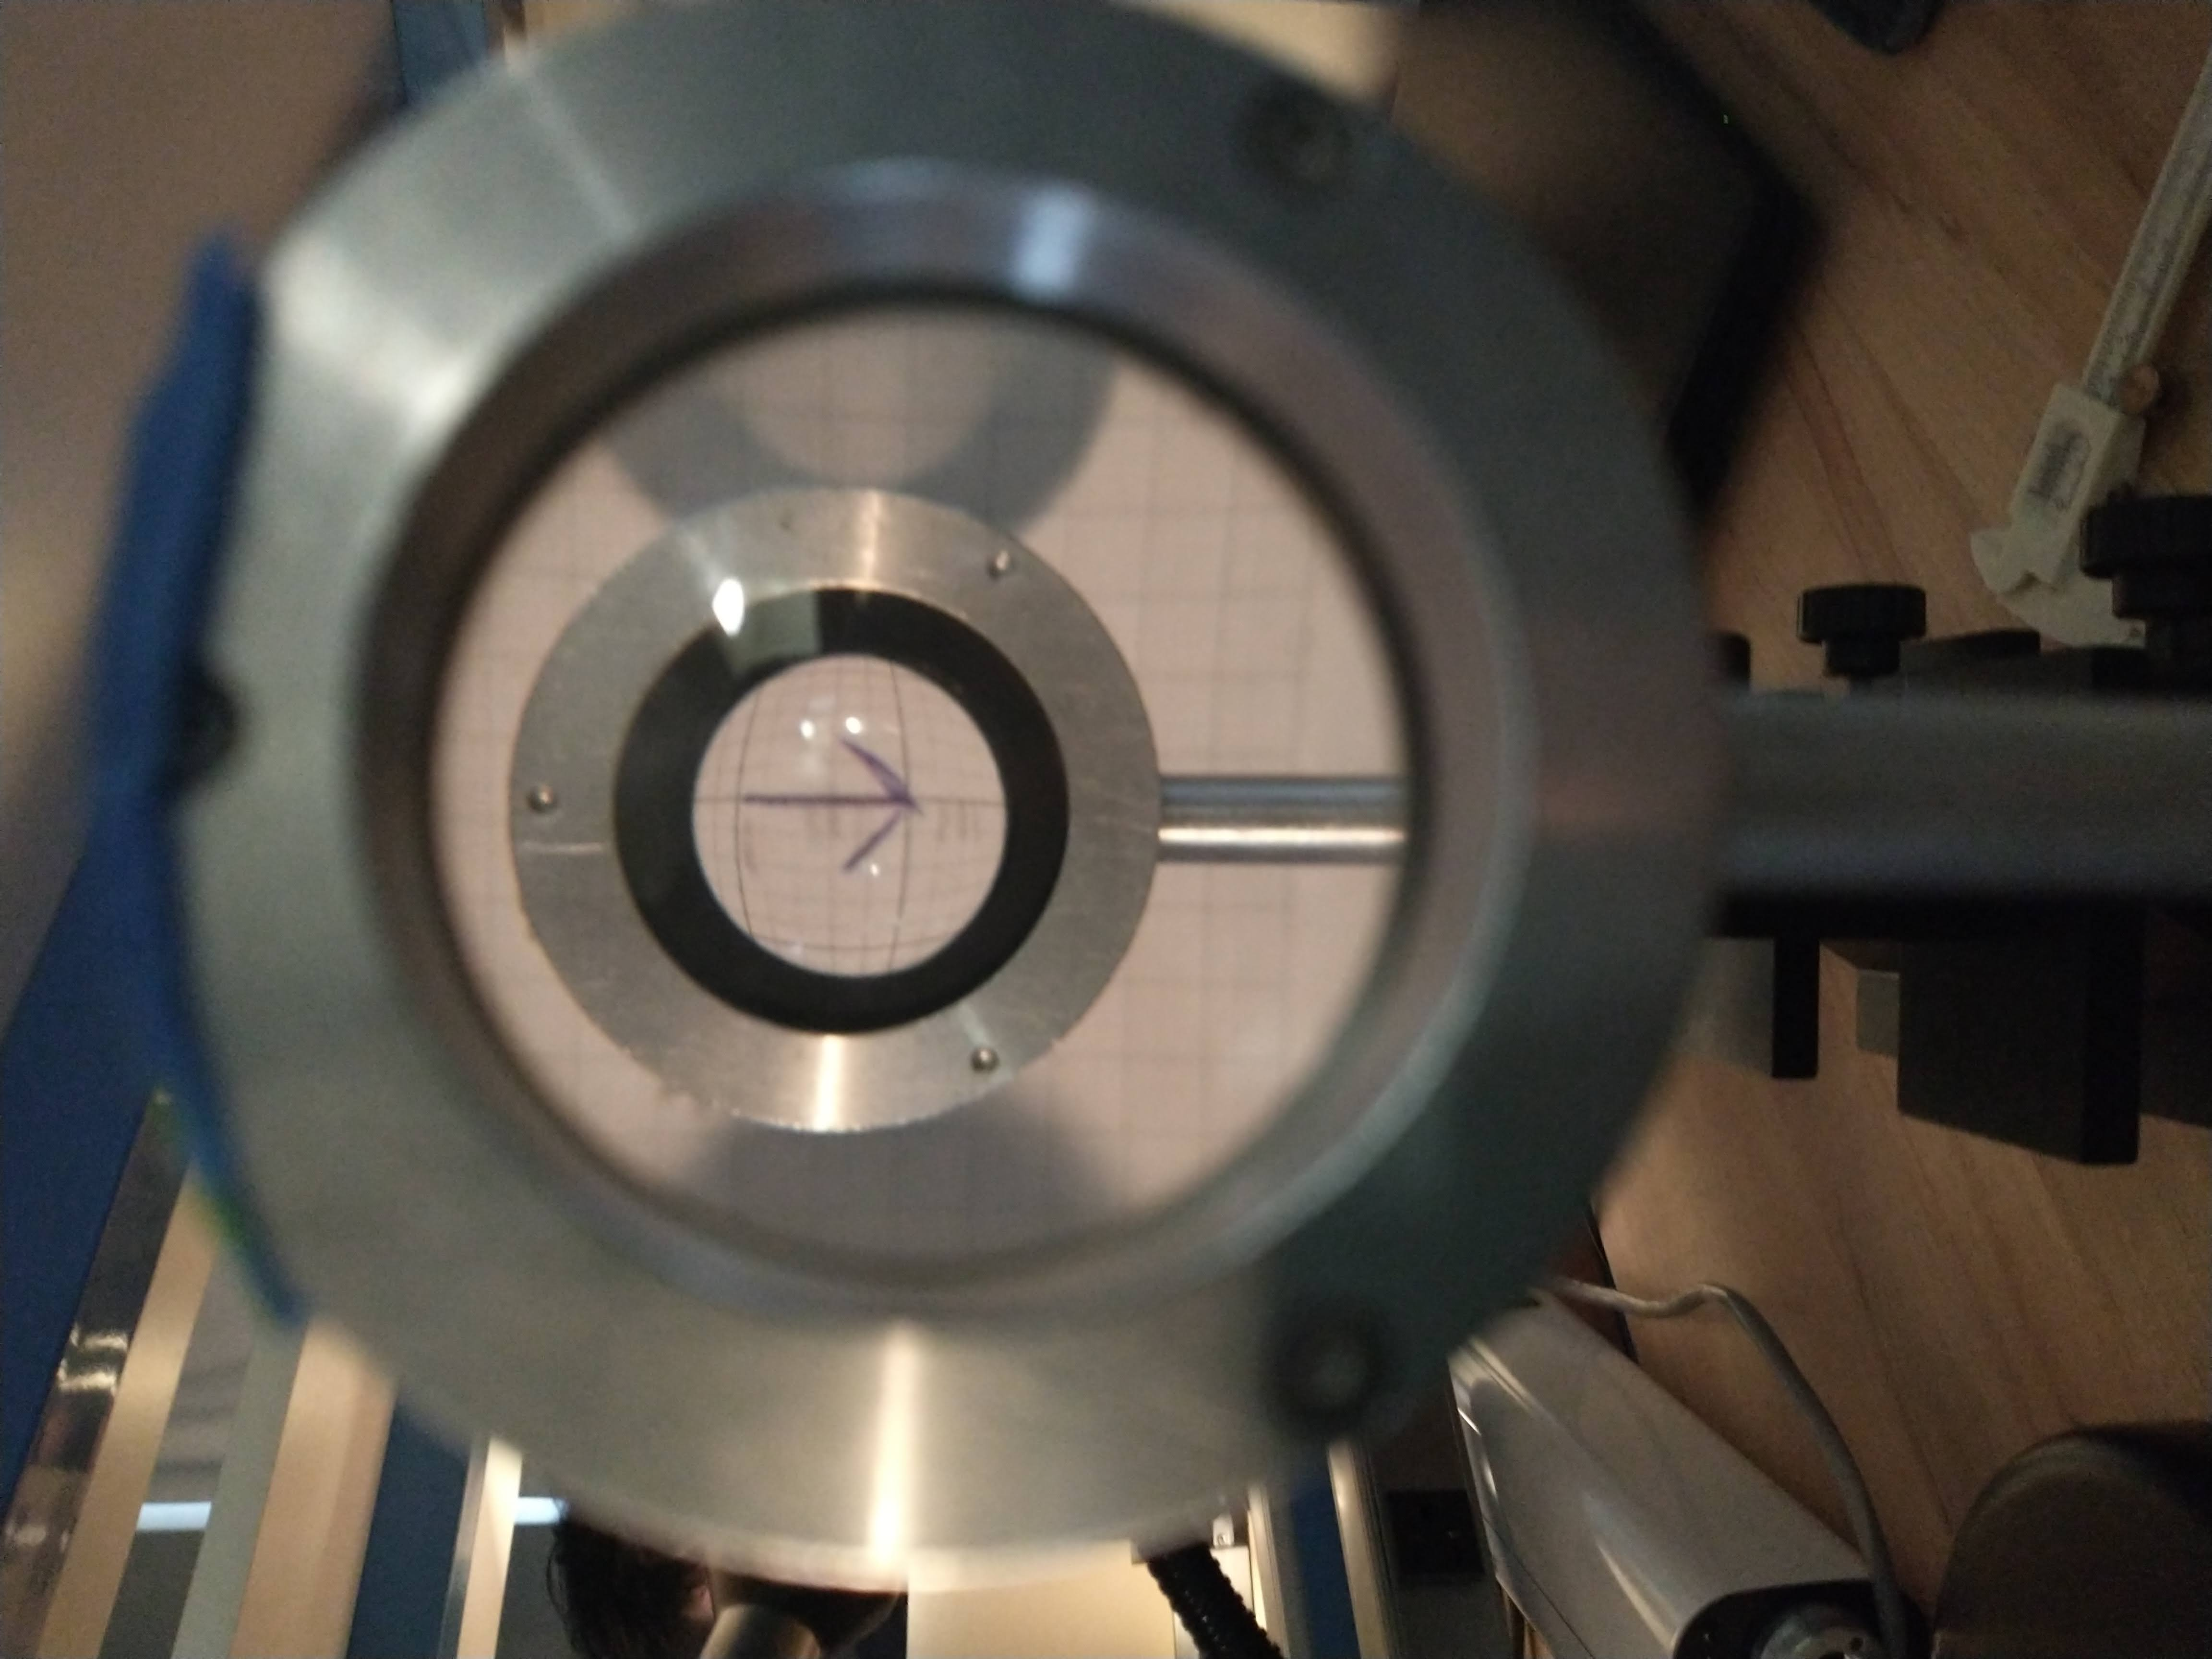

In [41]:
phone = 32.2
screen = 74.6
aLens = 46.3
cLens = 65.3

In [45]:
magnified = np.array([104, 100, 108]) #pixels
original = np.array([32, 30, 30]) #pixels (actual value is ~1cm)
mag = magnified.mean()/original.mean()
print('Relative Magnification: {:.4f}'.format(mag))

Relative Magnification: 3.3913


In [46]:
dist =  screen - phone
a = np.arctan(1/dist)#1 being the physical height of the arrow in cm
aPrime = np.arctan(mag/dist)# mag*1 = mag
print('The Angular Magnification is {:.4f}'.format(-aPrime/a))#negative because the arrow flips

The Angular Magnification is -3.3847
